In [2]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
path = "/content/sample_data/IT_2023_daily.csv"  # your local path to the dataset

In [ ]:
# Dataset import
dataset = pd.read_csv(path)
#dataset = pd.get_dummies(dataset)
dataset.head()

,Datetime (UTC),Country,Zone Name,Zone Id,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage,Data Source
0,2023-01-01 00:00:00,Italy,Italy,IT,379.65,469.16,36.62,29.86,NaN
1,2023-01-02 00:00:00,Italy,Italy,IT,382.22,473.26,32.57,25.70,NaN
2,2023-01-03 00:00:00,Italy,Italy,IT,355.16,438.82,38.82,27.60,NaN
3,2023-01-04 00:00:00,Italy,Italy,IT,322.82,399.05,46.08,34.40,NaN
4,2023-01-05 00:00:00,Italy,Italy,IT,335.14,414.30,42.83,31.53,NaN


In [ ]:
dataset.columns

Index(['Datetime (UTC)', 'Country', 'Zone Name', 'Zone Id',
       'Carbon Intensity gCO₂eq/kWh (direct)',
       'Carbon Intensity gCO₂eq/kWh (LCA)', 'Low Carbon Percentage',
       'Renewable Percentage', 'Data Source'],
      dtype='object')

array([[<Axes: title={'center': 'Carbon Intensity gCO₂eq/kWh (direct)'}>,
        <Axes: title={'center': 'Carbon Intensity gCO₂eq/kWh (LCA)'}>],
       [<Axes: title={'center': 'Low Carbon Percentage'}>,
        <Axes: title={'center': 'Renewable Percentage'}>]], dtype=object)

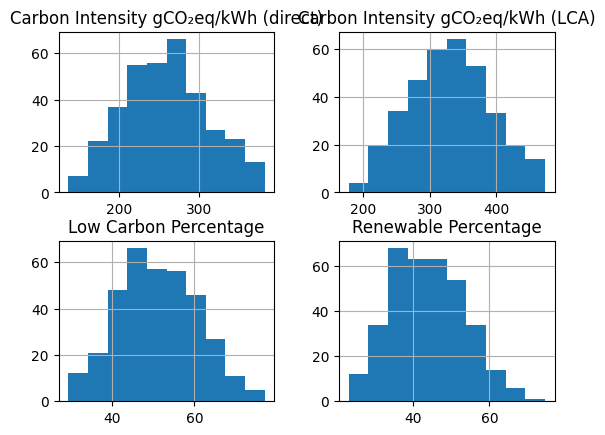

In [ ]:
# Distribution of data in our dataset
dataset.hist()

In [ ]:
# We want to study the correlation of the values present in the dataset
dataset.corr()

<ipython-input-60-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
Carbon Intensity gCO₂eq/kWh (direct),1.000000,0.998248,-0.936768,-0.905875
Carbon Intensity gCO₂eq/kWh (LCA),0.998248,1.000000,-0.953765,-0.920455
Low Carbon Percentage,-0.936768,-0.953765,1.000000,0.963986
Renewable Percentage,-0.905875,-0.920455,0.963986,1.000000


In [ ]:
print(dataset.to_string())

          Datetime (UTC) Country Zone Name Zone Id  Carbon Intensity gCO₂eq/kWh (direct)  Carbon Intensity gCO₂eq/kWh (LCA)  Low Carbon Percentage  Renewable Percentage                                   Data Source
0    2023-01-01 00:00:00   Italy     Italy      IT                                379.65                             469.16                  36.62                 29.86                                           NaN
1    2023-01-02 00:00:00   Italy     Italy      IT                                382.22                             473.26                  32.57                 25.70                                           NaN
2    2023-01-03 00:00:00   Italy     Italy      IT                                355.16                             438.82                  38.82                 27.60                                           NaN
3    2023-01-04 00:00:00   Italy     Italy      IT                                322.82                             399.05                 

In [ ]:
dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (direct)']
dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (LCA)']
dataset.describe(include='all').loc['mean'].loc['Low Carbon Percentage']
dataset.describe(include='all').loc['mean'].loc['Renewable Percentage']

43.88306590257879

In [ ]:
# We want to see important data related to our dataset
dataset.describe()

,Carbon Intensity gCO₂eq/kWh (direct),Carbon Intensity gCO₂eq/kWh (LCA),Low Carbon Percentage,Renewable Percentage
count,365.000000,365.000000,365.000000,365.000000
mean,259.074298,329.585530,51.315931,43.883066
std,52.142485,60.709778,9.293731,9.360976
min,136.480000,177.930000,29.540000,23.290000
25%,222.300000,287.130000,44.700000,37.140000
50%,259.074298,329.585530,51.315931,43.883066
75%,291.500000,369.410000,57.890000,50.370000
max,382.280000,473.440000,76.990000,74.480000


In [ ]:
# Here we substitute the NaN values present with the mean value of the respective KPI
dataset['Carbon Intensity gCO₂eq/kWh (direct)'] = dataset['Carbon Intensity gCO₂eq/kWh (direct)'].fillna(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (direct)'])
dataset['Carbon Intensity gCO₂eq/kWh (LCA)'] = dataset['Carbon Intensity gCO₂eq/kWh (LCA)'].fillna(dataset.describe(include='all').loc['mean'].loc['Carbon Intensity gCO₂eq/kWh (LCA)'])
dataset['Low Carbon Percentage'] = dataset['Low Carbon Percentage'].fillna(dataset.describe(include='all').loc['mean'].loc['Low Carbon Percentage'])
dataset['Renewable Percentage'] = dataset['Renewable Percentage'].fillna(dataset.describe(include='all').loc['mean'].loc['Renewable Percentage'])

In [ ]:
print(dataset.to_string())

          Datetime (UTC) Country Zone Name Zone Id  Carbon Intensity gCO₂eq/kWh (direct)  Carbon Intensity gCO₂eq/kWh (LCA)  Low Carbon Percentage  Renewable Percentage                                   Data Source
0    2023-01-01 00:00:00   Italy     Italy      IT                            379.650000                          469.16000              36.620000             29.860000                                           NaN
1    2023-01-02 00:00:00   Italy     Italy      IT                            382.220000                          473.26000              32.570000             25.700000                                           NaN
2    2023-01-03 00:00:00   Italy     Italy      IT                            355.160000                          438.82000              38.820000             27.600000                                           NaN
3    2023-01-04 00:00:00   Italy     Italy      IT                            322.820000                          399.05000              46.

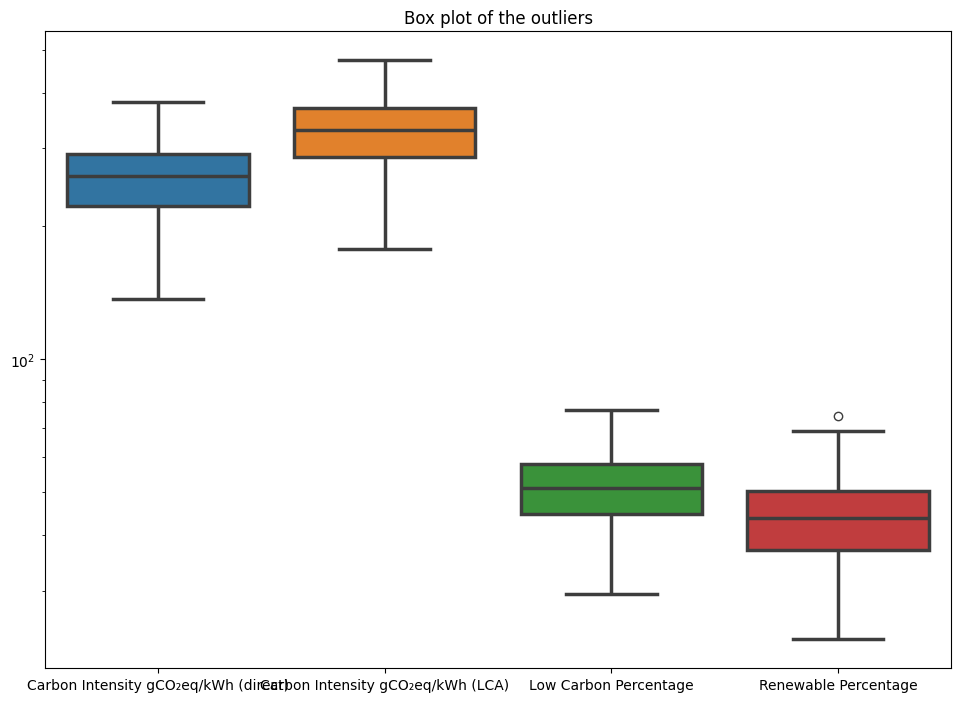

In [ ]:
# Box plot to see if there are outliers
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data = dataset,linewidth=2.5,ax=ax)
g.set_yscale("log")
plt.title("Box plot of the outliers")
plt.show()

In [ ]:
datacorr = dataset.corr()

<ipython-input-66-066b147d201b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datacorr = dataset.corr()


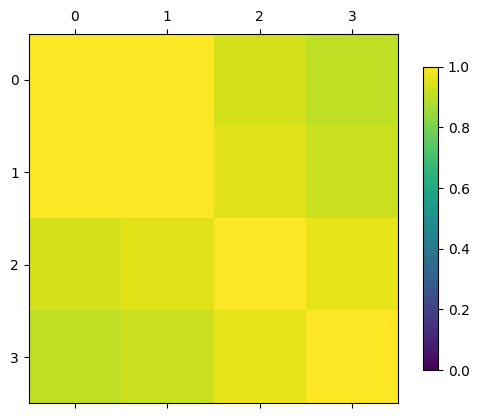

In [ ]:
correlations_absolute = abs(datacorr)
kwargs = {"shrink": 0.82}

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations_absolute, vmin=0, vmax = 1)
fig.colorbar(cax, **kwargs)
ticks = np.arange(0, 8, 1)
plt.show()

In [15]:
import pyarrow

# We need to import three datasets, one for the input power supply for the node 0, one for the node 1 and one for the total power of both nodes
path_P0 = "21-03/year_month=21-03/plugin=ipmi_pub/metric=ps0_input_power/a_0.parquet"  # your local path to the dataset
path_P1 = "21-03/year_month=21-03/plugin=ipmi_pub/metric=ps1_input_power/a_0.parquet"

dataset_P0 = pd.read_parquet(path_P0, engine='pyarrow')
dataset_P1 = pd.read_parquet(path_P1, engine='pyarrow')

path_TotP = "21-03/year_month=21-03/plugin=ipmi_pub/metric=total_power/a_0.parquet"
dataset_TotP = pd.read_parquet(path_TotP, engine='pyarrow')

,timestamp,value,node
2211122,2021-03-01 00:00:00+00:00,240,7
7964713,2021-03-01 00:00:00+00:00,310,673
8523278,2021-03-01 00:00:00+00:00,400,930
9054621,2021-03-01 00:00:00+00:00,530,832
8311079,2021-03-01 00:00:00+00:00,240,461
...,...,...,...
2396057,2021-03-30 14:53:40+00:00,450,120
2398631,2021-03-30 14:53:40+00:00,350,389
2397697,2021-03-30 14:53:40+00:00,440,291
2402853,2021-03-30 14:53:40+00:00,10,834


In [26]:
# Then we want to group the datasets into subsets, one for each node
grouped = dataset_P0.groupby('node')
node_datasets_P0 = {}
for node, group in grouped:
    node_datasets_P0[node] = group.copy()

node_datasets_P0

{'0':                         timestamp  value node
 2394885 2021-03-30 14:49:40+00:00    250    0
 2394886 2021-03-30 14:50:00+00:00    240    0
 2394887 2021-03-30 14:50:20+00:00    240    0
 2394888 2021-03-30 14:50:40+00:00    240    0
 2394889 2021-03-30 14:51:00+00:00    240    0
 ...                           ...    ...  ...
 9453950 2021-03-03 13:57:40+00:00    240    0
 9453951 2021-03-03 13:58:00+00:00    250    0
 9453952 2021-03-03 13:58:20+00:00    240    0
 9453953 2021-03-03 13:58:40+00:00    240    0
 9796227 2021-03-01 22:00:00+00:00    240    0
 
 [11167 rows x 3 columns],
 '1':                         timestamp  value node
 2394895 2021-03-30 14:49:40+00:00    260    1
 2394896 2021-03-30 14:50:00+00:00    270    1
 2394897 2021-03-30 14:50:20+00:00    270    1
 2394898 2021-03-30 14:50:40+00:00    260    1
 2394899 2021-03-30 14:51:00+00:00    270    1
 ...                           ...    ...  ...
 9456646 2021-03-03 13:57:20+00:00    260    1
 9456647 2021-03-03 1

In [27]:
grouped = dataset_P1.groupby('node')
node_datasets_P1 = {}
for node, group in grouped:
    node_datasets_P1[node] = group.copy()

node_datasets_P1

{'0':                         timestamp  value node
 222618  2021-03-01 23:00:00+00:00    290    0
 222619  2021-03-01 23:00:20+00:00    290    0
 222620  2021-03-01 23:00:40+00:00    290    0
 222621  2021-03-01 23:01:00+00:00    290    0
 222622  2021-03-01 23:01:20+00:00    290    0
 ...                           ...    ...  ...
 9152983 2021-03-01 22:58:20+00:00    290    0
 9152984 2021-03-01 22:58:40+00:00    300    0
 9152985 2021-03-01 22:59:00+00:00    290    0
 9152986 2021-03-01 22:59:20+00:00    290    0
 9152987 2021-03-01 22:59:40+00:00    290    0
 
 [11167 rows x 3 columns],
 '1':                         timestamp  value node
 226938  2021-03-01 23:00:00+00:00    290    1
 226939  2021-03-01 23:00:20+00:00    280    1
 226940  2021-03-01 23:00:40+00:00    280    1
 226941  2021-03-01 23:01:00+00:00    280    1
 226942  2021-03-01 23:01:20+00:00    280    1
 ...                           ...    ...  ...
 9157123 2021-03-01 22:58:20+00:00    280    1
 9157124 2021-03-01 2

In [48]:
grouped = dataset_TotP.groupby('node')
node_datasets_TotP = {}
for node, group in grouped:
    node_datasets_TotP[node] = group.copy()

node_datasets_TotP

{'0':                         timestamp  value node
 2490368 2021-03-01 00:00:00+00:00    420    0
 2490369 2021-03-01 00:00:20+00:00    420    0
 2490370 2021-03-01 00:00:40+00:00    420    0
 2490371 2021-03-01 00:01:00+00:00    420    0
 2490372 2021-03-01 00:01:20+00:00    420    0
 ...                           ...    ...  ...
 5935302 2021-03-02 22:58:40+00:00    420    0
 5935303 2021-03-02 22:59:00+00:00    420    0
 5935304 2021-03-02 22:59:20+00:00    420    0
 5935305 2021-03-02 22:59:40+00:00    420    0
 9568404 2021-03-01 22:00:00+00:00    420    0
 
 [11167 rows x 3 columns],
 '1':                         timestamp  value node
 2494507 2021-03-01 00:00:00+00:00    400    1
 2494508 2021-03-01 00:00:20+00:00    400    1
 2494509 2021-03-01 00:00:40+00:00    400    1
 2494510 2021-03-01 00:01:00+00:00    400    1
 2494511 2021-03-01 00:01:20+00:00    400    1
 ...                           ...    ...  ...
 7846109 2021-03-02 22:58:20+00:00    400    1
 7846110 2021-03-02 2

In [65]:
# Now we compute the total input power for each node, summing the values of P0 and P1 input power, and we compare the obtained value with the one present in the total power dataset for the same node
import math

for key in node_datasets_P1:
    computed_sum = node_datasets_P1[key]['value'].cumsum().iloc[-1] + node_datasets_P0[key]['value'].cumsum().iloc[-1]
    registered_sum = node_datasets_TotP[key]['value'].cumsum().iloc[-1]
    print(f'Computed sum: {computed_sum / 1000} kW, Registered sum: {registered_sum / 1000} kW -> Percentage difference: {math.floor(100 - (100*registered_sum / computed_sum))}%')

Computed sum: 5951.03 kW, Registered sum: 4783.56 kW -> Percentage difference: 19%
Computed sum: 6095.2 kW, Registered sum: 4465.7 kW -> Percentage difference: 26%
Computed sum: 6082.73 kW, Registered sum: 4873.62 kW -> Percentage difference: 19%
Computed sum: 10.28 kW, Registered sum: 8.58 kW -> Percentage difference: 16%
Computed sum: 10569.99 kW, Registered sum: 8546.32 kW -> Percentage difference: 19%
Computed sum: 9319.83 kW, Registered sum: 7369.26 kW -> Percentage difference: 20%
Computed sum: 11153.0 kW, Registered sum: 9373.24 kW -> Percentage difference: 15%
Computed sum: 11200.07 kW, Registered sum: 9582.2 kW -> Percentage difference: 14%
Computed sum: 12203.92 kW, Registered sum: 10191.74 kW -> Percentage difference: 16%
Computed sum: 10315.15 kW, Registered sum: 8571.24 kW -> Percentage difference: 16%
Computed sum: 8926.96 kW, Registered sum: 7231.62 kW -> Percentage difference: 18%
Computed sum: 8482.56 kW, Registered sum: 6771.48 kW -> Percentage difference: 20%
Compute